In [1]:
import numpy as np
import os
import pandas as pd
import requests
import datetime
import requests
from bs4 import BeautifulSoup as soup

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

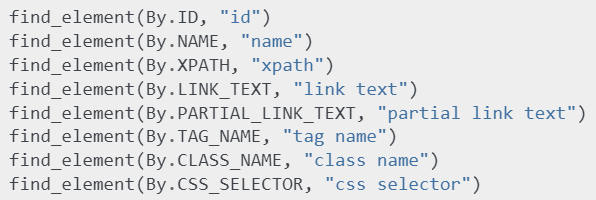

In [3]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [19]:
CHROMEDRIVER_URL = "c:\chromedriver.exe"
WINDOW_SIZE = "1920,1080"
URL = "https://www.vanguardinvestor.co.uk/what-we-offer/all-products"

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)

driver = webdriver.Chrome(executable_path=CHROMEDRIVER_URL, options=chrome_options)
driver.implicitly_wait(5)
driver.get(URL)

funds = {}

names = driver.find_elements(By.XPATH, "//h2[contains(@class, 'mr-3')]")
charges = driver.find_elements(By.XPATH, "//div[contains(@class, 'fund-card__text-bold') and contains(text(),'%')]")
for i, name in enumerate(names):
    funds[name.text] = charges[i].text

driver.close()

In [20]:
len(funds)

79

In [21]:
funds.keys()

dict_keys(['LifeStrategy® 20% Equity Fund', 'LifeStrategy® 40% Equity Fund', 'LifeStrategy® 60% Equity Fund', 'LifeStrategy® 80% Equity Fund', 'LifeStrategy® 100% Equity Fund', 'SustainableLife 40-50% Equity Fund', 'SustainableLife 60-70% Equity Fund', 'SustainableLife 80-90% Equity Fund', 'Target Retirement 2015 Fund', 'Target Retirement 2020 Fund', 'Target Retirement 2025 Fund', 'Target Retirement 2030 Fund', 'Target Retirement 2035 Fund', 'Target Retirement 2040 Fund', 'Target Retirement 2045 Fund', 'Target Retirement 2050 Fund', 'Target Retirement 2055 Fund', 'Target Retirement 2060 Fund', 'Target Retirement 2065 Fund', 'Active U.K. Equity Fund', 'Emerging Markets Bond Fund', 'Emerging Markets Stock Index Fund', 'ESG Developed World All Cap Equity Index Fund', 'ESG Developed World All Cap Equity Index Fund (UK)', 'ESG Emerging Markets All Cap Equity Index Fund', 'ESG Global All Cap UCITS ETF', 'ESG Global Corporate Bond UCITS ETF', 'EUR Corporate Bond UCITS ETF', 'EUR Eurozone Gove

In [24]:
URL = 'https://www.vanguard.co.uk/professional/product'

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)

driver = webdriver.Chrome(executable_path=CHROMEDRIVER_URL, options=chrome_options)
driver.implicitly_wait(5)
driver.get(URL)

fund_links = {}

for i, fund_name in enumerate(funds.keys()):
    f = driver.find_element(By.XPATH, f"//a[contains(text(), '{fund_name}')]")
    fund_links[fund_name] = f.get_attribute("href")
    print(i, f.get_attribute("href"))

driver.close()

0 https://www.vanguard.co.uk/professional/product/fund/lifestrategy/9235/lifestrategy-20-equity-fund-gbp-acc
1 https://www.vanguard.co.uk/professional/product/fund/lifestrategy/9238/lifestrategy-40-equity-fund-gbp-acc
2 https://www.vanguard.co.uk/professional/product/fund/lifestrategy/9241/lifestrategy-60-equity-fund-gbp-acc
3 https://www.vanguard.co.uk/professional/product/fund/lifestrategy/9244/lifestrategy-80-equity-fund-gbp-acc
4 https://www.vanguard.co.uk/professional/product/fund/lifestrategy/9232/lifestrategy-100-equity-fund-gbp-acc
5 https://www.vanguard.co.uk/professional/product/fund/balanced/E016/sustainablelife-40-50-equity-fund-gbp-acc
6 https://www.vanguard.co.uk/professional/product/fund/balanced/9415/sustainablelife-60-70-equity-fund-gbp-acc
7 https://www.vanguard.co.uk/professional/product/fund/balanced/E018/sustainablelife-80-90-equity-fund-gbp-acc
8 https://www.vanguard.co.uk/professional/product/fund/target-retirement/9665/target-retirement-2015-fund-gbp-acc
9 https

74 https://www.vanguard.co.uk/professional/product/fund/bond/9972/us-investment-grade-credit-index-fund-eur-acc
75 https://www.vanguard.co.uk/professional/product/etf/bond/9592/usd-corporate-1-3-year-bond-ucits-etf-usd-accumulating
76 https://www.vanguard.co.uk/professional/product/etf/bond/9594/usd-corporate-bond-ucits-etf-usd-accumulating
77 https://www.vanguard.co.uk/professional/product/etf/bond/9596/usd-emerging-markets-government-bond-ucits-etf-usd-accumulating
78 https://www.vanguard.co.uk/professional/product/etf/bond/9598/usd-treasury-bond-ucits-etf-usd-accumulating


In [42]:
for link in fund_links.values():
    chrome_options = Options()
    # chrome_options.add_argument("--headless")
    chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)
    chrome_options.add_experimental_option("prefs", {
            "download.default_directory": r'C:\Users\Weronika\Desktop\Intrinsic_Value\files\\',
            "download.prompt_for_download": False,
            "download.directory_upgrade": True,
            "safebrowsing_for_trusted_sources_enabled": False,
            "safebrowsing.enabled": False
    })

    driver = webdriver.Chrome(executable_path=CHROMEDRIVER_URL, options=chrome_options)
    driver.implicitly_wait(20)
    print(link)
    driver.get(link)
    try:
        driver.find_element(By.ID, "onetrust-reject-all-handler").click()
        driver.implicitly_wait(5)
        driver.find_element(By.XPATH, "button[contains(text(), 'I agree')]").click()
        driver.implicitly_wait(10)
    except:
        print("No cookies popup detected")
    driver.find_element(By.CSS_SELECTOR, "button[title='Download Excel Spreadsheet']").click()
    break

https://www.vanguard.co.uk/professional/product/fund/lifestrategy/9235/lifestrategy-20-equity-fund-gbp-acc
No cookies popup detected


ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (1302, 6478)
  (Session info: chrome=103.0.5060.114)


In [ ]:
driver.close()